# **Implementation Of McCulloch Pitts Neuron**

In [1]:
# linear algebra
import numpy as np
# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
#To Visulize
import matplotlib.pyplot as plt
#For splitting the data into train test
from sklearn.model_selection import train_test_split
#For model evaluation
from sklearn.metrics import accuracy_score
#For getting the breast cancer dataset
import sklearn.datasets

# Load Data
Breast Cancer Wisconsin (Diagnostic) --> https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

In [2]:
cancer=sklearn.datasets.load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
#Convert data into pandas dataframe
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df['Class']=cancer.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


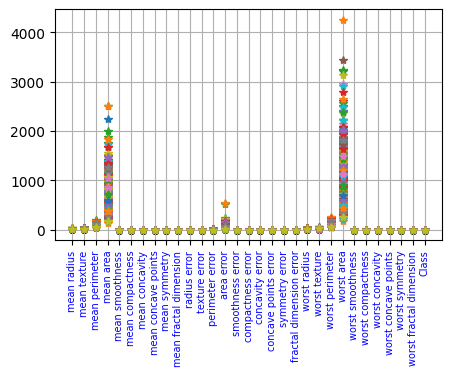

In [4]:
#Visualizing Data
fig, ax = plt.subplots(1, figsize = (5, 3))
ax.grid()
plt.xticks(rotation='vertical',c='b',size=7)
plt.plot(df.T,'*') #Transpose df because we need columns as x-axis
plt.show()

#Splitting Data into train and test data

In [5]:
#Target columns assign to y
y=df['Class']
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [6]:
#Splitting data into train test
x=df.drop('Class',axis=1)  #Drop the target column
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)

he stratify parameter ensures that the splitting process maintains the same proportion of target variable classes in the train and test sets as in the original dataset.

In this case, y represents the target variable (or the dependent variable), and by setting stratify = y, the splitting process will be performed in a way that preserves the proportion of different classes in y. This is particularly useful when dealing with imbalanced datasets, where the distribution of classes is uneven.

By using stratify = y, you are ensuring that the training and testing datasets will have similar class distributions as the original dataset, which can help prevent bias in the model's performance evaluation

# Binning Data

Here we convert the data into zeros and ones, to make it compatible with the MP Neuron model, we do this using the cut method in the pandas library

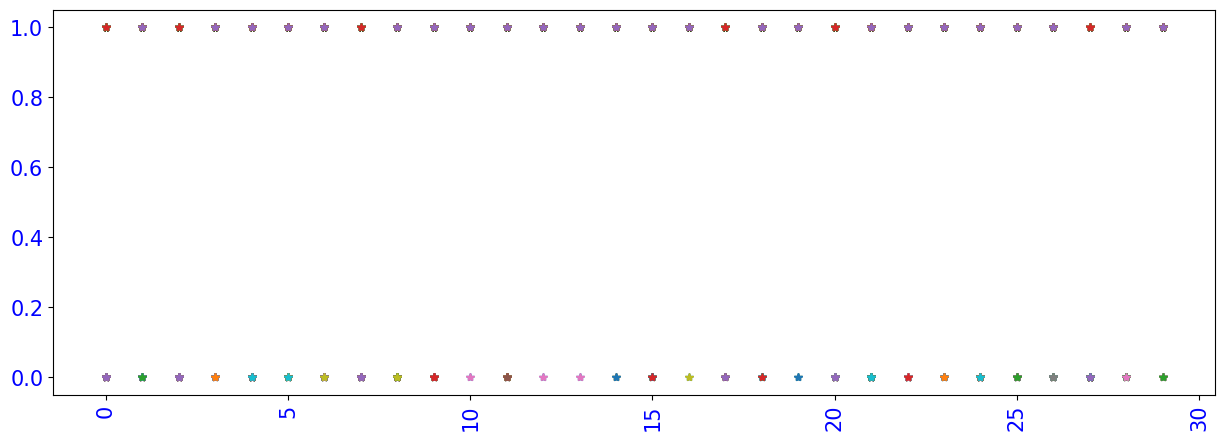

In [7]:
x_train_bin=x_train.apply(pd.cut,bins=2,labels=[1,0]).values
x_test_bin=x_test.apply(pd.cut,bins=2,labels=[1,0]).values

#Plotting data
plt.figure(figsize=(15,5))
plt.plot(x_train_bin.T,'*')
plt.xticks(rotation='vertical',c='b',size=15)
plt.yticks(c='b',size=15)
plt.show()

# Define MP Neuron

In [8]:
class MP_neuron:
    #Initializing the parameter value to 0
    def __init__(self):
        self.b=0
    #Defining model
    def Model(self,x):
        return np.sum(x)>=self.b

    #optimize alogorithm
    def fit(self,x,y):
        #Storing accuracies for different value of b
        accuracy={}

        #Since the range of b is from [0,n]
        for b in range(x.shape[1]+1):
            self.b=b
            yhat=[]
            for row in x:
                yhat.append(self.Model(row))
            accuracy[b]=accuracy_score(yhat,y)
        best_b=max(accuracy,key=accuracy.get)
        self.b=best_b
        return [accuracy,best_b,accuracy[best_b]]
    def predict(self,x,y):
        yhat=[]
        for row in x:
            yhat.append(self.Model(row))
        accuracy=accuracy_score(y,yhat)
        return accuracy

# Evaluation

In [9]:
neuron=MP_neuron()
accuracy,best_b,accuracy_model=neuron.fit(x_train_bin,y_train)
print('The optimal value of b: ',best_b)
print("Accuracy Model on training data: ",accuracy_model*100)

The optimal value of b:  28
Accuracy Model on training data:  84.61538461538461


on the training data the performance of the model is pretty good, ie 84.6%, let visualize the performance of the model for different values of b.

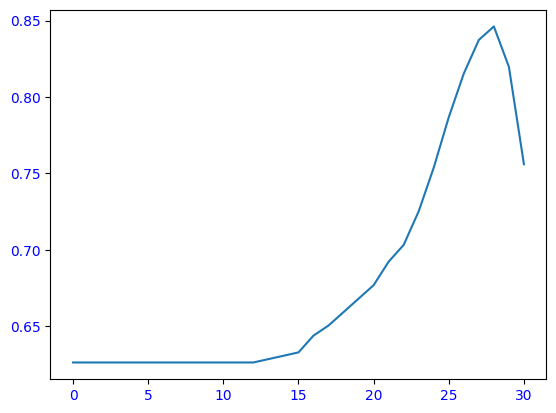

In [11]:
#Since accuracy is a dictionary,let's convert into list for plotting

accuracies=list(accuracy.values())
plt.plot(accuracies)
plt.xticks(c='b')
plt.yticks(c='b')
plt.show()

# Performance on Test Data

In [13]:
#Testing model on test data set
accuracy=neuron.predict(x_test_bin,y_test)
print("The Model accuracy on Test Data: ",accuracy*100)

The Model accuracy on Test Data:  78.0701754385965


# Conclusion

We build a very simplified computational model of a biological neuron, and we got 78% accuracy on test data that is not bad for such a simple model